# **Curso Python: Clase 16**
## Kruskal-wallis

#   Inferential statistic Non-parametric: Kruskal-Wallis test

![Non-parametric](../manuals/figures/flowchart_nonparametric.png)
Vallat, R. (2018). Pingouin: statistics in Python. Journal of Open Source Software, 3(31), 1026
- https://pingouin-stats.org/build/html/index.html
- https://doi.org/10.21105/joss.01026

In [5]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [6]:
# Path to the file to be imported
path = "../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
co2_data = import_csv(path)

## Kruskal-Wallis H-test for independent samples

In [7]:
from scipy.stats import kruskal

def kruskal_wallis_test(*groups, alpha=0.05):
    """
    Performs the Kruskal-Wallis H-test for independent samples.
    Accepts multiple groups as arguments.
    Prints the H statistic, p-value, and interpretation.
    """
    result = kruskal(*groups)
    
    print(f"H statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    
    if result.pvalue < alpha:
        print("The difference between groups is statistically significant.")
    else:
        print("No statistically significant difference between groups.")


In [8]:
import scikit_posthocs as sp
# You need to install the scikit-posthocs package: conda install -c conda-forge scikit-posthocs

def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    """
    Runs Dunn's post-hoc test after Kruskal-Wallis.
    """
    result = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result)
    return result


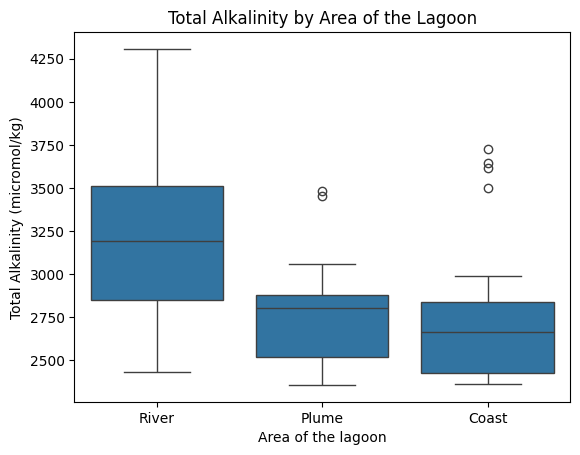

In [9]:
# Plot ta values for each area of the lagoon using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='ta_micromol_kg', data=co2_data)
plt.xlabel('Area of the lagoon')
plt.ylabel('Total Alkalinity (micromol/kg)')
plt.title('Total Alkalinity by Area of the Lagoon')
plt.show()

In [10]:
# Select the data for each area of the lagoon
ta_river = co2_data[co2_data['area'] == 'River']['ta_micromol_kg']
ta_plume = co2_data[co2_data['area'] == 'Plume']['ta_micromol_kg']
ta_coast= co2_data[co2_data['area'] == 'Coast']['ta_micromol_kg']

In [11]:
# Perform the Kruskal-Wallis test
kruskal_wallis_test(ta_river, ta_plume, ta_coast)

H statistic = 23.340675555846637
p-value = 8.543517259038796e-06
The difference between groups is statistically significant.


In [12]:
dunn_posthoc(co2_data, 'area', 'ta_micromol_kg')

          Coast     Plume     River
Coast  1.000000  1.000000  0.000016
Plume  1.000000  1.000000  0.000659
River  0.000016  0.000659  1.000000


,Coast,Plume,River
Coast,1.000000,1.000000,0.000016
Plume,1.000000,1.000000,0.000659
River,0.000016,0.000659,1.000000


### Exercise: Perform Kruskal-Wallis test and plot a box plot for DIC and temperature data.

Vallat, R. (2018). Pingouin: statistics in Python. Journal of Open Source Software, 3(31), 1026
- https://pingouin-stats.org/build/html/index.html
- https://doi.org/10.21105/joss.01026